In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
dataset = pd.read_csv('dataset.csv')
dataset.shape
%matplotlib inline

In [23]:
prices = dataset['Price']
features = dataset.drop('Price', axis = 1)
features.head()

,Single Core Score,Multi Core Score,DxO Mark Rating,Release Date
0,1912,6397,98,19-10-17
1,1918,6316,98,19-10-17
2,4204,10111,97,03-09-17
3,1960,6472,94,23-08-17
4,4216,10108,92,22-09-17


In [24]:
 
features['Release Date'] = pd.to_datetime(features['Release Date'], format='%d-%m-%y')
features['OperationalDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01-05-18'],[len(features)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%d-%m-%y')  

features['OperationalDays'] = dateLastTrain['Date'] - features['Release Date']

features['OperationalDays'] = features['OperationalDays'].astype('timedelta64[D]').astype(int)

features = features.drop('Release Date', axis=1)



In [25]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Smartphone prediction dataset:\n")
print("Minimum price: bdt {:,.2f}".format(minimum_price))
print("Maximum price: bdt {:,.2f}".format(maximum_price))
print("Mean price: bdt {:,.2f}".format(mean_price))
print("Median price bdt {:,.2f}".format(median_price))
print("Standard deviation of prices: bdt {:,.2f}".format(std_price))

Statistics for Smartphone prediction dataset:

Minimum price: bdt 4,500.00
Maximum price: bdt 176,000.00
Mean price: bdt 44,278.63
Median price bdt 41,000.00
Standard deviation of prices: bdt 25,115.15


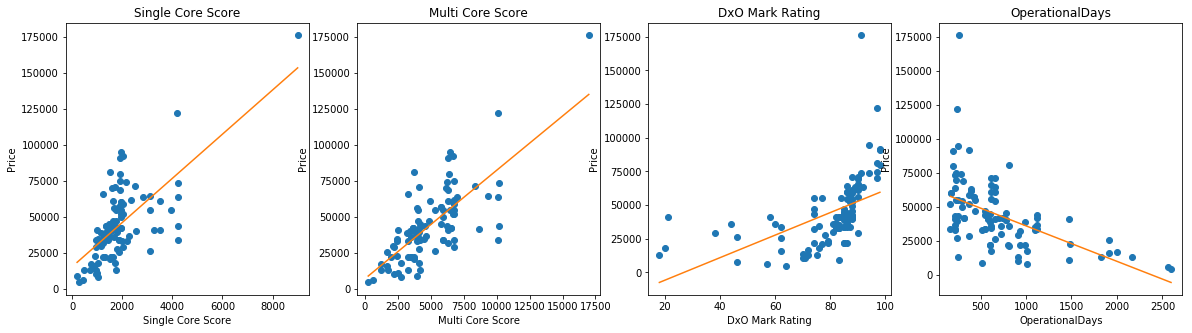

In [26]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 4
    plt.subplot(1,4, i+1)
    x = features[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

In [27]:
# TODO: Import 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    from sklearn.metrics import r2_score
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score


In [53]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

randomForest = ensemble.RandomForestRegressor(n_estimators=150)
bagging = ensemble.BaggingClassifier()
decisionTree = DecisionTreeRegressor(max_depth=5)
linearReg = LinearRegression()
logisticReg = LogisticRegression()
lassoReg = Lasso()

randomForest_score = 0
decisionTree_score = 0
linear_score = 0
ridge_score = 0
logistic_score = 0
lasso_score = 0
bagging_score = 0

#randomForest.fit(xTrain, yTrain)
#pred = cls.predict(xTest)
   

In [60]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(features)

for train_index, test_index in kf.split(features):
    X_train = np.array(features)[train_index]
    X_test = np.array(features)[test_index]
    
    y_train = np.array(prices)[train_index]
    y_test = np.array(prices)[test_index]
    
    randomForest.fit(X_train,y_train)
    decisionTree.fit(X_train,y_train)
    linearReg.fit(X_train,y_train)
    logisticReg.fit(X_train,y_train)
    lassoReg.fit(X_train,y_train)
    bagging.fit(X_train,y_train)
    
    randomForest_score += performance_metric(y_test,randomForest.predict(X_test))
    decisionTree_score += performance_metric(y_test,decisionTree.predict(X_test))
    linear_score += performance_metric(y_test,linearReg.predict(X_test))
    logistic_score += performance_metric(y_test,logisticReg.predict(X_test))
    lasso_score += performance_metric(y_test,lassoReg.predict(X_test))
    bagging_score += performance_metric(y_test,bagging.predict(X_test))

In [62]:
randomForest_score  /= 5
decisionTree_score /= 5
linear_score /= 5
logistic_score /= 5
lasso_score /= 5
bagging_score /= 5

print('randomForest_score: '+str(randomForest_score))
print('decisionTree_score: '+str(decisionTree_score))
print('linear_score: '+str(linear_score))
print('logistic_score: '+str(logistic_score))
print('lasso_score: '+str(lasso_score))
print('bagging_score: '+str(bagging_score))

randomForest_score: 0.120137223886
decisionTree_score: 0.0760238471588
linear_score: 0.0285483146832
logistic_score: -0.0406583691805
lasso_score: 0.0285480149035
bagging_score: 0.0176761723531
